In [1]:
# Juan Pardo Palazón

# Importacion de librerias
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas import read_csv

In [2]:
# Configurar tamaño del gráfico y fuente inicial
pyplot.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':100})
pyplot.rcParams['font.size'] = 10

In [3]:
# Filtrar por fechas dadas y seleccionar columna consumo total (Aggregate)
def showGraph(to_plot, file_name, numero_hogar):
    """Muestra el gráfico de la gráfica y se guarda
    la misma en un fichero png.
     
    Argumentos:
    to_plot -- datos a guardar
    file_name -- nombre del fichero a leer (sin el numero de hogar)
    numero_hogar -- numero de hogar a tratar
    """
        
    # Genera el gráfico y se establecen los ejes
    interpolated_data = to_plot.interpolate(method='spline', order=2)
    plot = interpolated_data.plot()
    plt.title('Consumo semanal por rango horario. Hogar ' + numero_hogar, fontsize = 16)
    plt.xlabel('Semanas', fontsize = 14)
    plt.ylabel('Consumo de energía', fontsize = 14)
    plt.show()
    
    # Se recoge la gráfica y se guarda en un fichero png
    fig = plot.get_figure()
    fig.savefig(file_name + 'AGG.png')

In [4]:
def getFileAndPlot(file_name, numero_hogar):
    """Lee el fichero con los datos transformados
     
    Argumentos:
    file_name -- nombre del fichero a leer (sin el numero de hogar)
    numero_hogar -- numero de hogar a tratar
    """
    dataset = read_csv(file_name + '.csv', header=0, infer_datetime_format=True, index_col=['Time'])
    showGraph(dataset, file_name, numero_hogar)

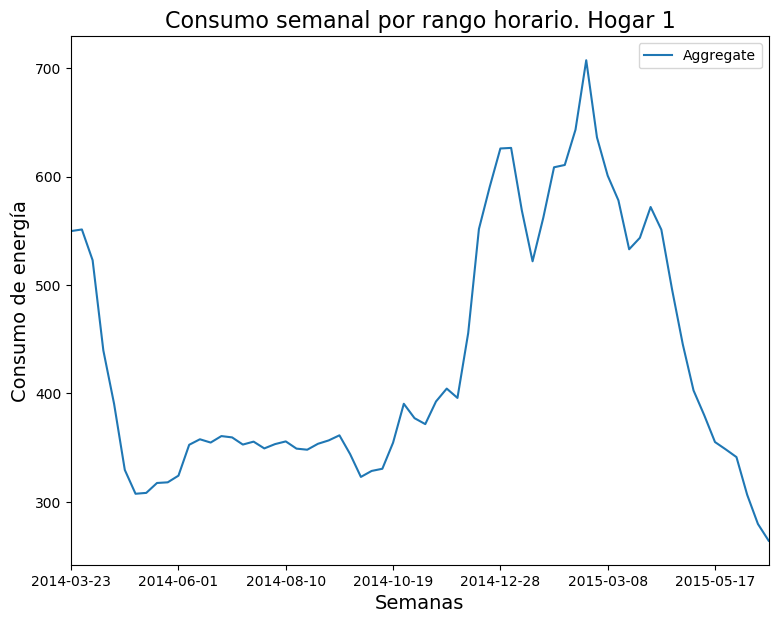

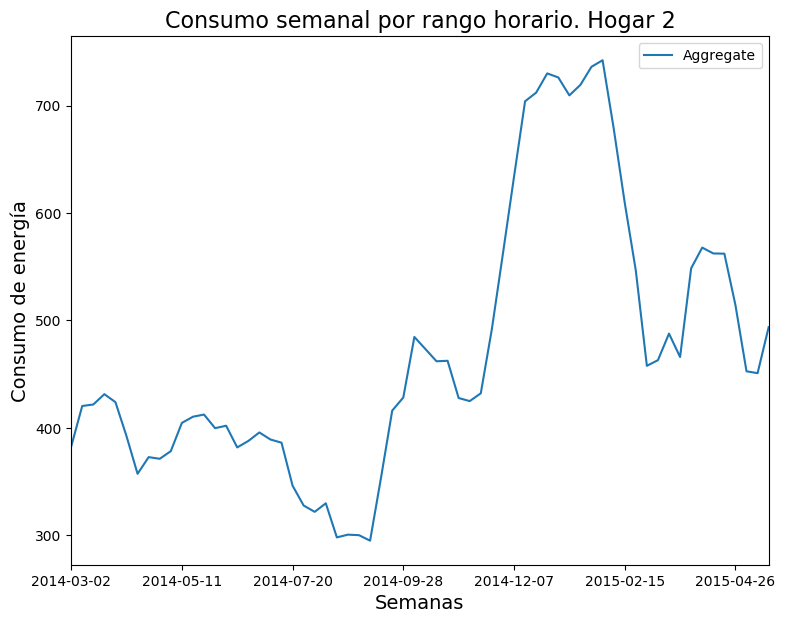

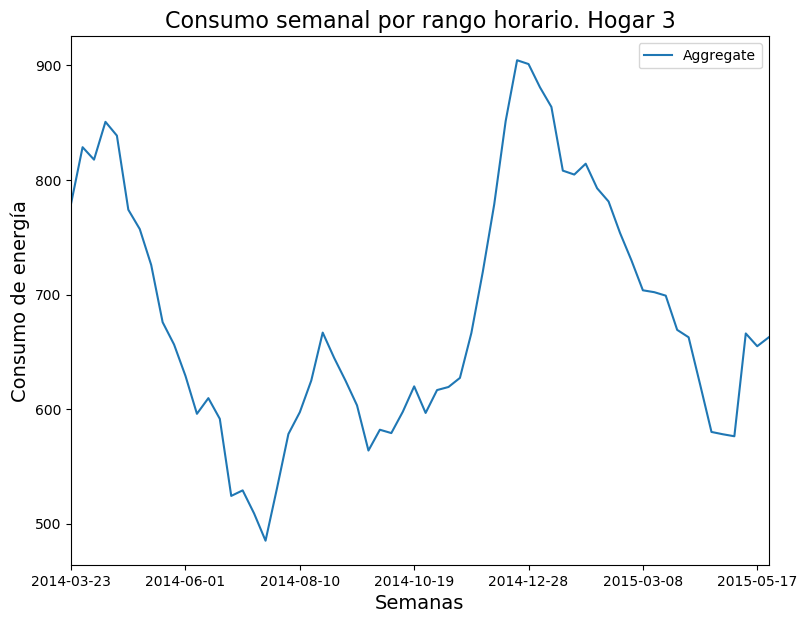

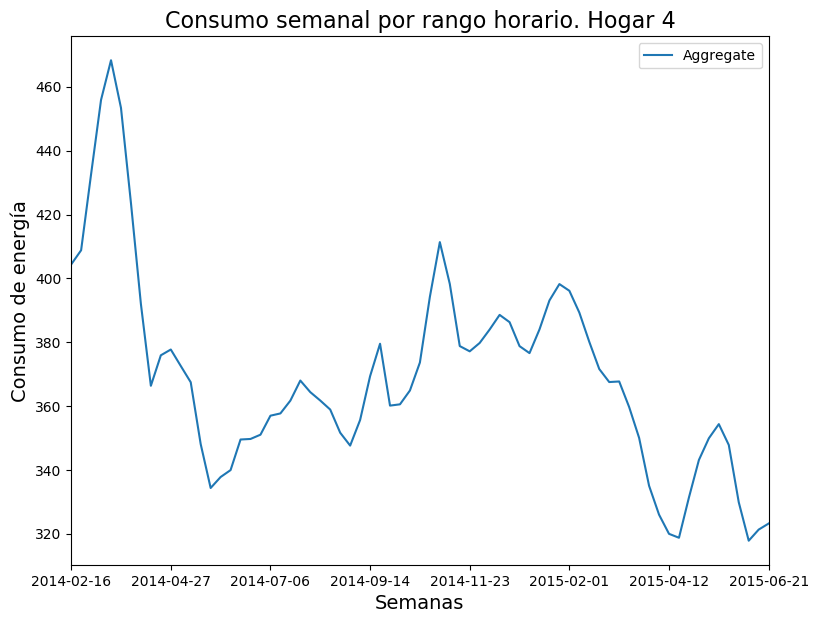

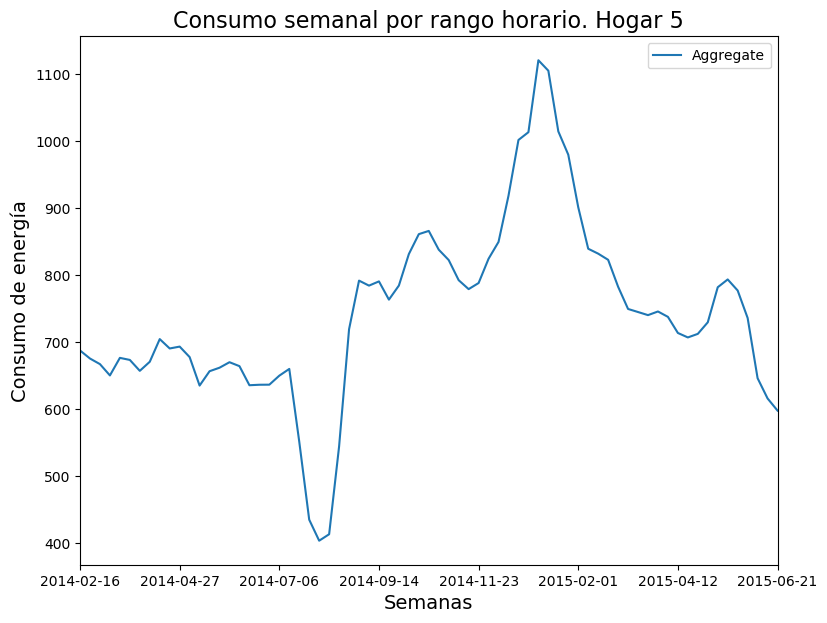

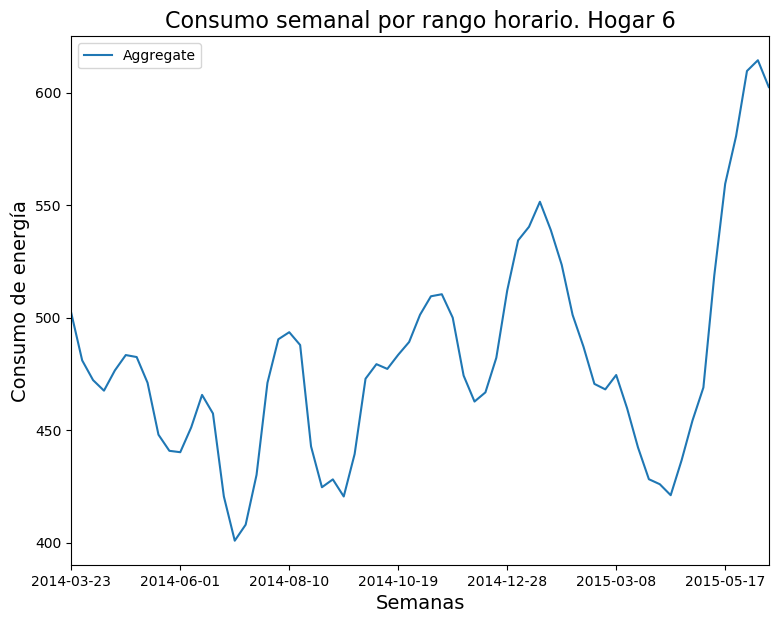

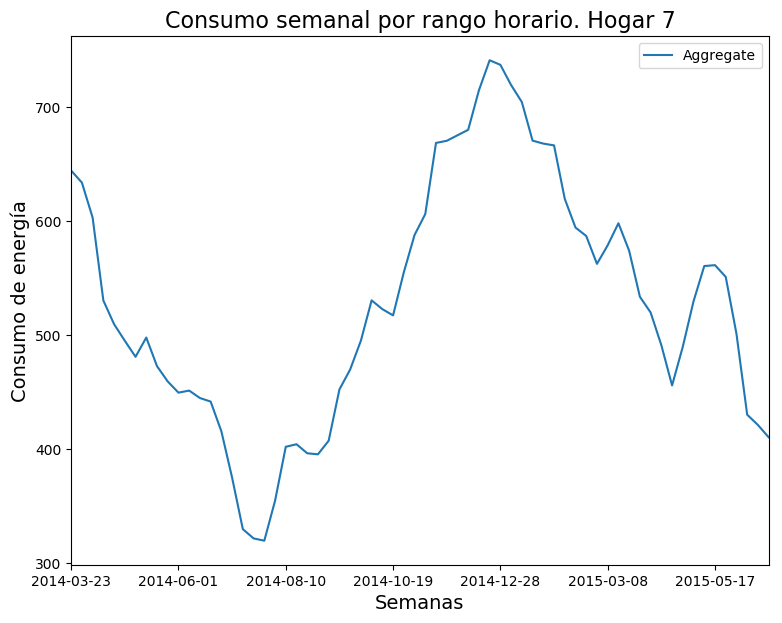

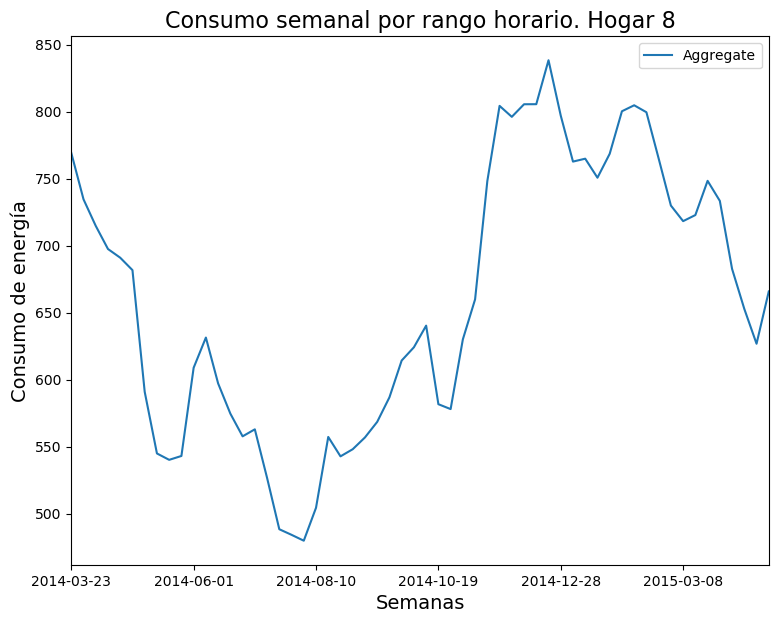

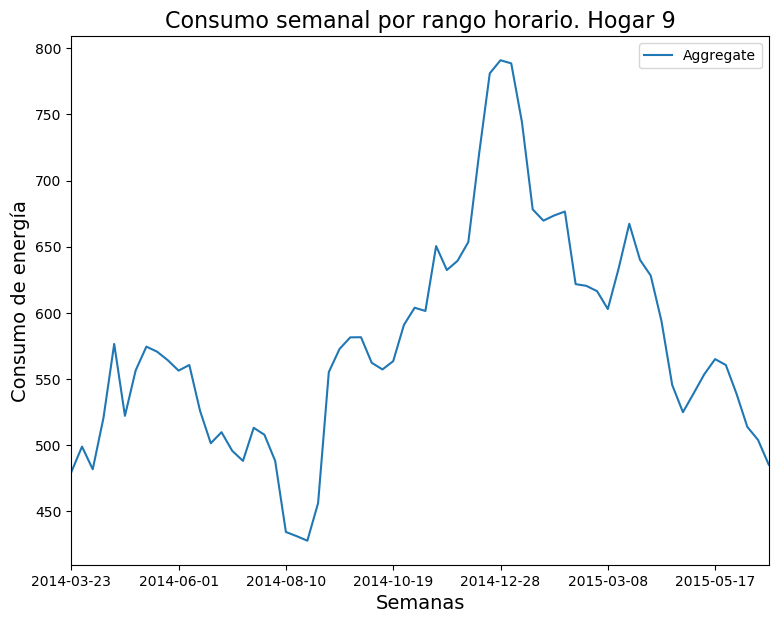

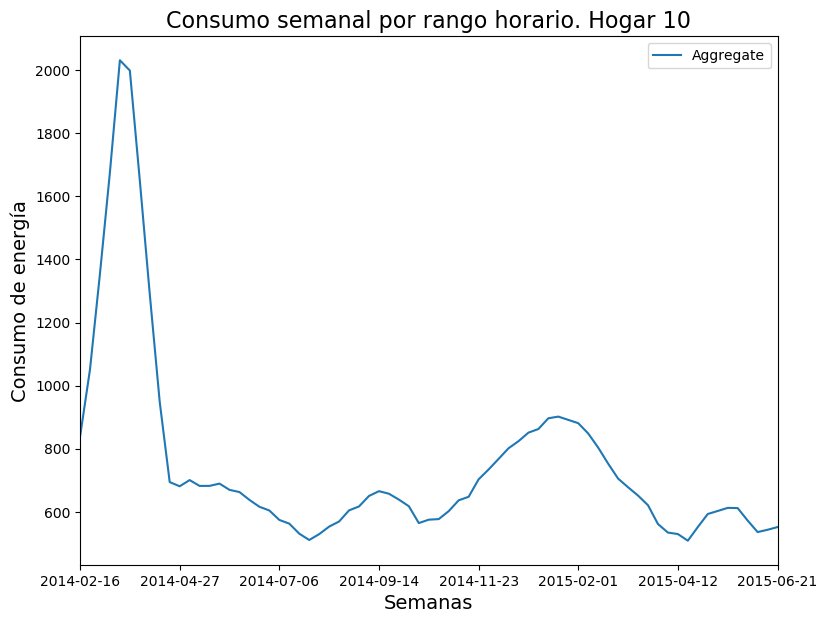

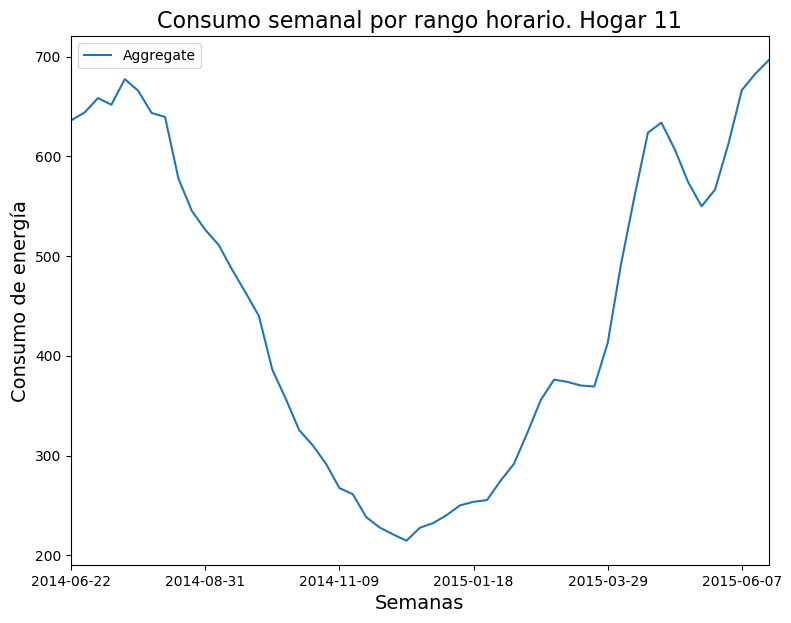

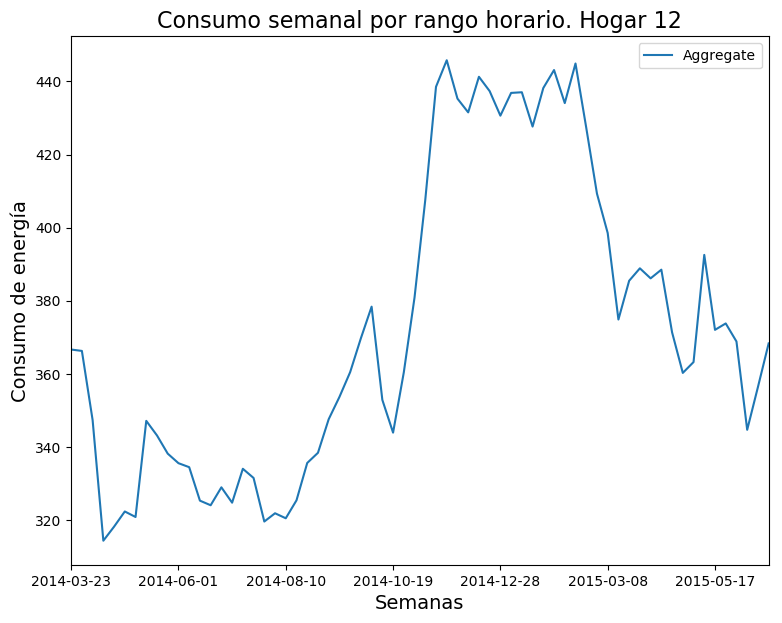

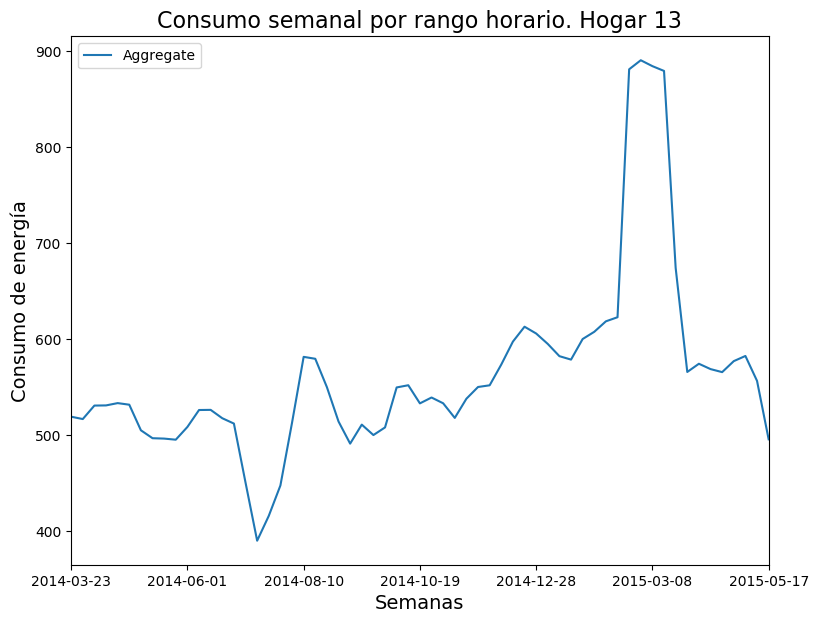

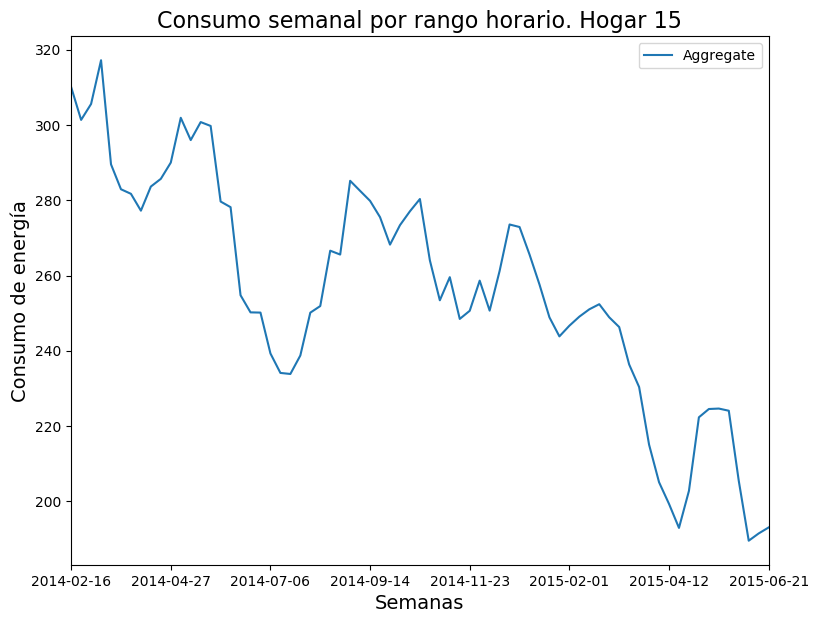

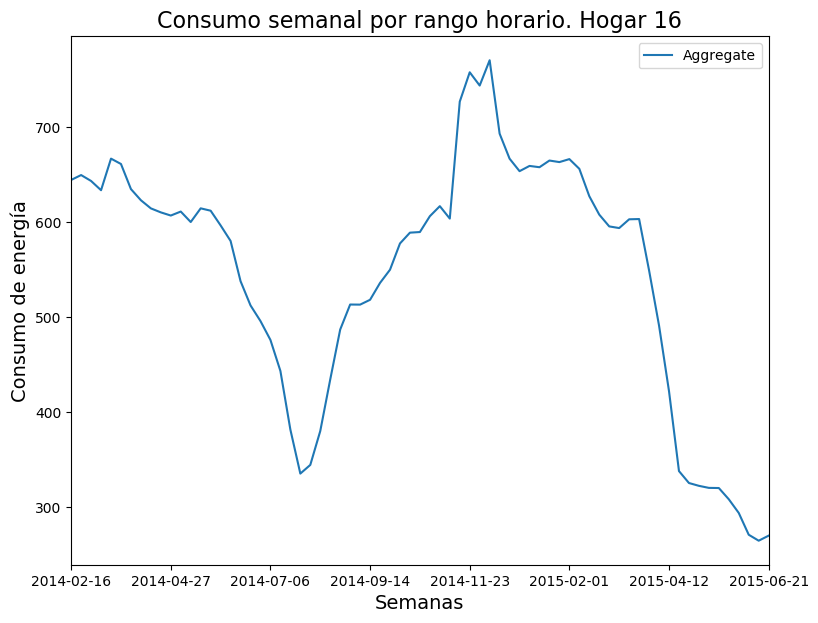

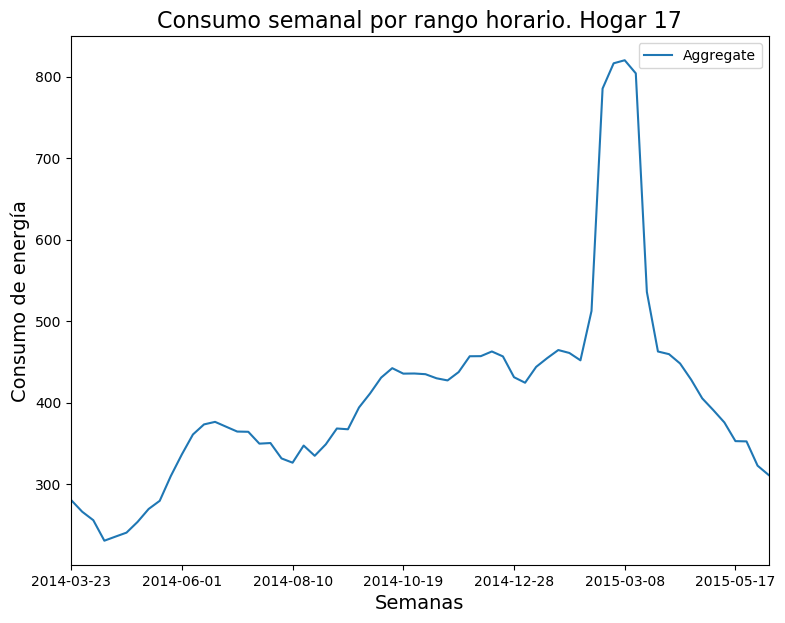

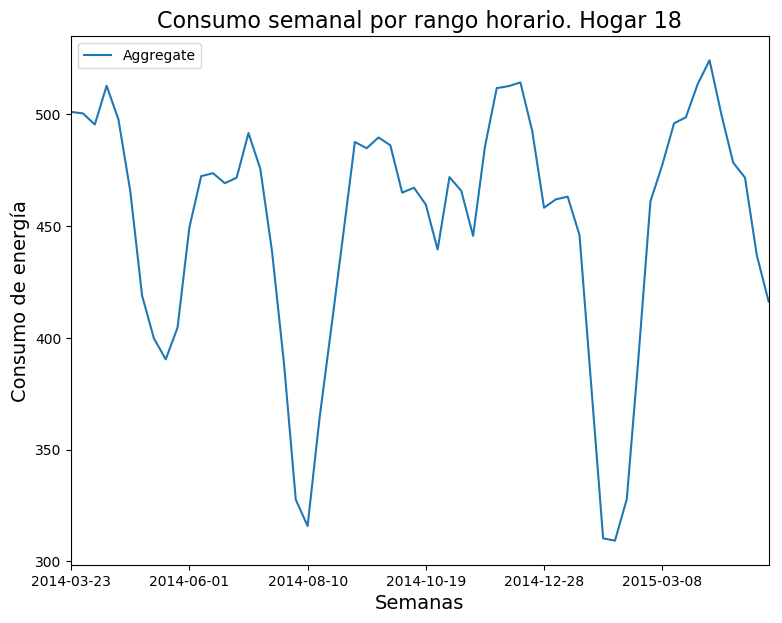

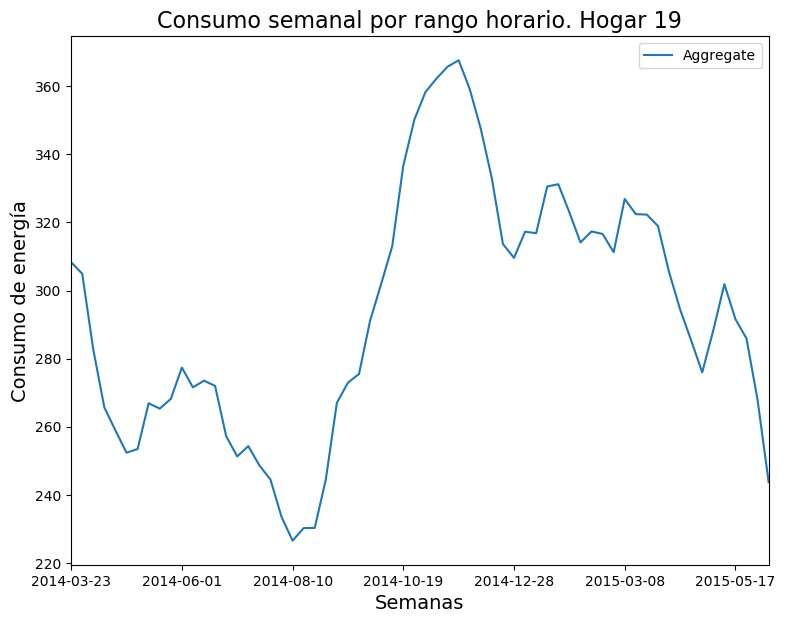

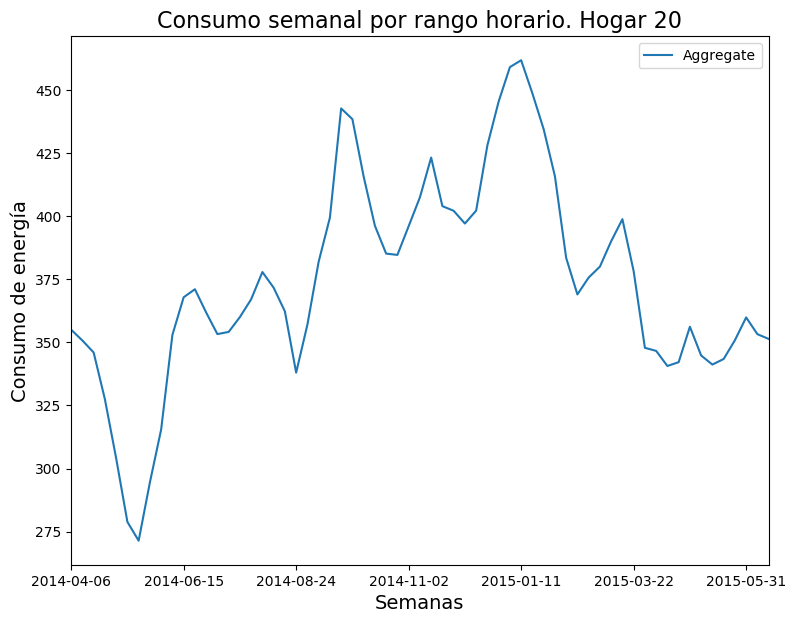

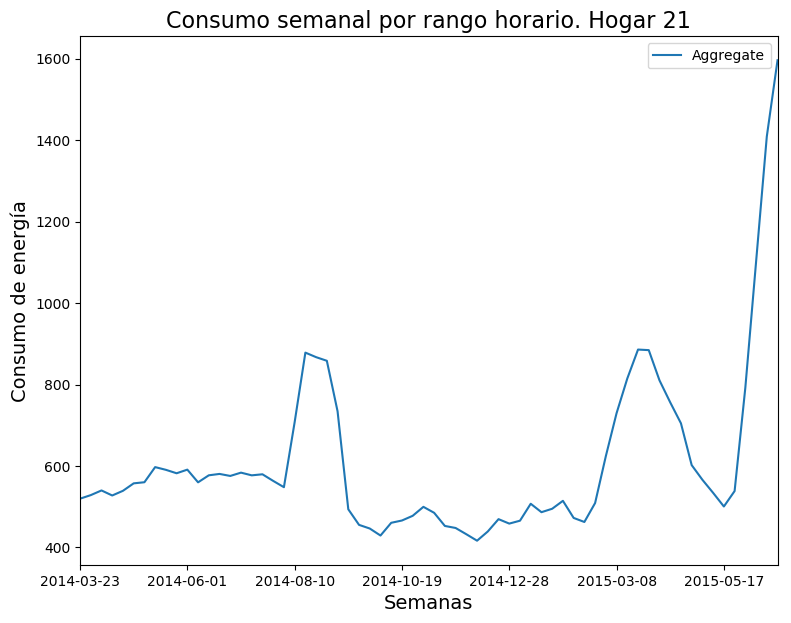

In [5]:
# Generar las gráficas
for x in range(1, 22):
    if x != 14:
        getFileAndPlot('CLEAN_House' + str(x) + '_weekagg', str(x))